<a href="https://colab.research.google.com/github/marybello/Arobelandsons/blob/master/hamoye_stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import csv

In [ ]:
df = pd.read_csv('energydata_complete.csv', quoting=csv.QUOTE_NONE)

In [ ]:
df.head()

,"""date""","""Appliances""","""lights""","""T1""","""RH_1""","""T2""","""RH_2""","""T3""","""RH_3""","""T4""","""RH_4""","""T5""","""RH_5""","""T6""","""RH_6""","""T7""","""RH_7""","""T8""","""RH_8""","""T9""","""RH_9""","""T_out""","""Press_mm_hg""","""RH_out""","""Windspeed""","""Visibility""","""Tdewpoint""","""rv1""","""rv2"""
0,"""2016-01-11 17:00:00""",""" 60""","""30""","""19.890000000000001""","""47.596666666666700""","""19.199999999999999""","""44.789999999999999""","""19.789999999999999""","""44.729999999999997""","""19.000000000000000""","""45.566666666666698""","""17.166666666666700""","""55.200000000000003""",""" 7.026666666666669947""","""84.2566666666667032""","""17.199999999999999""","""41.626666666666701""","""18.199999999999999""","""48.899999999999999""","""17.033333333333299""","""45.530000000000001""",""" 6.5999999999999996e+00""","""733.50000000000000""",""" 92.000000000000000""",""" 7.00000000000000000""","""63.0000000000000000""",""" 5.2999999999999998e+00""","""13.2754331571049988270""","""13.2754331571049988270"""
1,"""2016-01-11 17:10:00""",""" 60""","""30""","""19.890000000000001""","""46.693333333333300""","""19.199999999999999""","""44.722499999999997""","""19.789999999999999""","""44.789999999999999""","""19.000000000000000""","""45.992500000000000""","""17.166666666666700""","""55.200000000000003""",""" 6.833333333333330373""","""84.0633333333333042""","""17.199999999999999""","""41.560000000000002""","""18.199999999999999""","""48.863333333333301""","""17.066666666666698""","""45.560000000000002""",""" 6.4833333333333298e+00""","""733.60000000000002""",""" 92.000000000000000""",""" 6.66666666666666963""","""59.1666666666666998""",""" 5.2000000000000002e+00""","""18.6061949818395078182""","""18.6061949818395078182"""
2,"""2016-01-11 17:20:00""",""" 50""","""30""","""19.890000000000001""","""46.299999999999997""","""19.199999999999999""","""44.626666666666701""","""19.789999999999999""","""44.933333333333302""","""18.926666666666701""","""45.890000000000001""","""17.166666666666700""","""55.090000000000003""",""" 6.559999999999999609""","""83.1566666666666947""","""17.199999999999999""","""41.433333333333302""","""18.199999999999999""","""48.729999999999997""","""17.000000000000000""","""45.500000000000000""",""" 6.3666666666666698e+00""","""733.70000000000005""",""" 92.000000000000000""",""" 6.33333333333333037""","""55.3333333333333002""",""" 5.0999999999999996e+00""","""28.6426681675948202610""","""28.6426681675948202610"""
3,"""2016-01-11 17:30:00""",""" 50""","""40""","""19.890000000000001""","""46.066666666666698""","""19.199999999999999""","""44.590000000000003""","""19.789999999999999""","""45.000000000000000""","""18.890000000000001""","""45.723333333333301""","""17.166666666666700""","""55.090000000000003""",""" 6.433333333333330017""","""83.4233333333333036""","""17.133333333333301""","""41.289999999999999""","""18.100000000000001""","""48.590000000000003""","""17.000000000000000""","""45.399999999999999""",""" 6.2500000000000000e+00""","""733.79999999999995""",""" 92.000000000000000""",""" 6.00000000000000000""","""51.5000000000000000""",""" 5.0000000000000000e+00""","""45.4103894997388124466""","""45.4103894997388124466"""
4,"""2016-01-11 17:40:00""",""" 60""","""40""","""19.890000000000001""","""46.333333333333300""","""19.199999999999999""","""44.530000000000001""","""19.789999999999999""","""45.000000000000000""","""18.890000000000001""","""45.530000000000001""","""17.199999999999999""","""55.090000000000003""",""" 6.366666666666669805""","""84.8933333333333024""","""17.199999999999999""","""41.229999999999997""","""18.100000000000001""","""48.590000000000003""","""17.000000000000000""","""45.399999999999999""",""" 6.1333333333333302e+00""","""733.89999999999998""",""" 92.000000000000000""",""" 5.66666666666666963""","""47.6666666666666998""",""" 4.9000000000000004e+00""","""10.0840965518727898598""","""10.0840965518727898598"""


In [ ]:
for i, col in enumerate(df.columns):
    df.iloc[:, i] = df.iloc[:, i].str.replace('"', '')
    

In [ ]:
df= pd.read_csv('stage2.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', '"date"', '"Appliances"', '"lights"', '"T1"', '"RH_1"',
       '"T2"', '"RH_2"', '"T3"', '"RH_3"', '"T4"', '"RH_4"', '"T5"', '"RH_5"',
       '"T6"', '"RH_6"', '"T7"', '"RH_7"', '"T8"', '"RH_8"', '"T9"', '"RH_9"',
       '"T_out"', '"Press_mm_hg"', '"RH_out"', '"Windspeed"', '"Visibility"',
       '"Tdewpoint"', '"rv1"', '"rv2"'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.sample(1)

,"""date""","""Appliances""","""lights""","""T1""","""RH_1""","""T2""","""RH_2""","""T3""","""RH_3""","""T4""","""RH_4""","""T5""","""RH_5""","""T6""","""RH_6""","""T7""","""RH_7""","""T8""","""RH_8""","""T9""","""RH_9""","""T_out""","""Press_mm_hg""","""RH_out""","""Windspeed""","""Visibility""","""Tdewpoint""","""rv1""","""rv2"""
12859,2016-04-10 00:10:00,40,0,22.133333,40.79,19.7,43.966667,22.89,39.7,20.5,38.59,20.014286,46.712857,7.226667,55.863333,21.7,36.73,22.89,40.668571,20.1,40.43,7.016667,750.783333,93.666667,1.833333,38.166667,6.016667,3.557348,3.557348


In [ ]:
df.columns = df.columns.str.replace('"', '')

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.sample(1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
7518,2016-03-03 22:00:00,40,0,22.452857,36.985714,21.0,37.59,21.25625,37.6475,20.1,34.668571,20.361429,44.147143,1.033333,75.706667,19.251429,30.168571,21.89,39.767143,18.39,36.738571,1.3,749.4,92.0,3.0,23.0,0.1,10.776926,10.776926


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

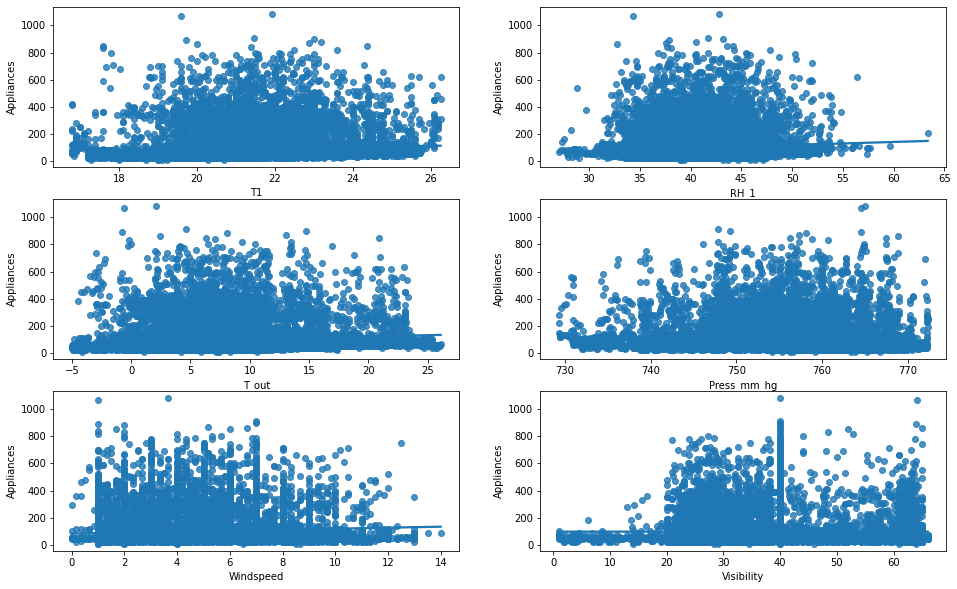

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.regplot(x='T1', y='Appliances', data=df)
plt.subplot(3,2,2)
sns.regplot(x='RH_1', y='Appliances', data=df)
plt.subplot(3,2,3)
sns.regplot(x='T_out', y='Appliances', data=df)
plt.subplot(3,2,4)
sns.regplot(x='Press_mm_hg', y='Appliances', data=df)
plt.subplot(3,2,5)
sns.regplot(x='Windspeed', y='Appliances', data=df)
plt.subplot(3,2,6)
sns.regplot(x='Visibility', y='Appliances', data=df)

(array([1.6238e+04, 1.7230e+03, 8.3900e+02, 4.9300e+02, 2.1200e+02,
        1.3000e+02, 6.9000e+01, 2.4000e+01, 5.0000e+00, 2.0000e+00]),
 array([  10.,  117.,  224.,  331.,  438.,  545.,  652.,  759.,  866.,
         973., 1080.]),
 <a list of 10 Patch objects>)

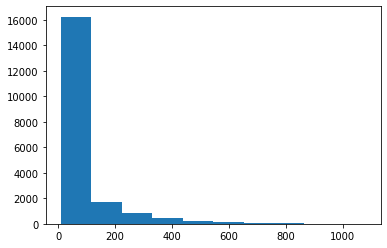

In [ ]:
#check if it's normally distributed
plt.hist(df['Appliances']) #from the plots below, it is not

In [ ]:
#taking the log to normalize the data
df['norm_appliances'] = np.log(df['Appliances'])

In [16]:
df = pd.read_csv('norm_data.csv')

(array([   9.,  340., 2638., 6455., 4010., 1703.,  661.,  867.,  329.,
          80.]),
 array([2.30258509, 2.77079822, 3.23901134, 3.70722446, 4.17543758,
        4.64365071, 5.11186383, 5.58007695, 6.04829007, 6.5165032 ,
        6.98471632]),
 <a list of 10 Patch objects>)

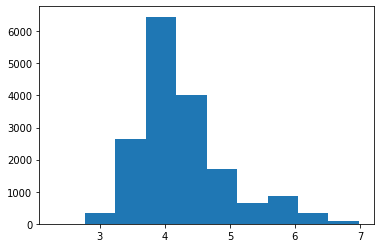

In [6]:
plt.hist(df['norm_appliances']) # it is now normalized

In [ ]:
#checking for correlation
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,norm_appliances
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.900397
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,0.261442
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.160747
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,0.084457
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.214756
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.093674
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.167221
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.006462
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.132359
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.006533


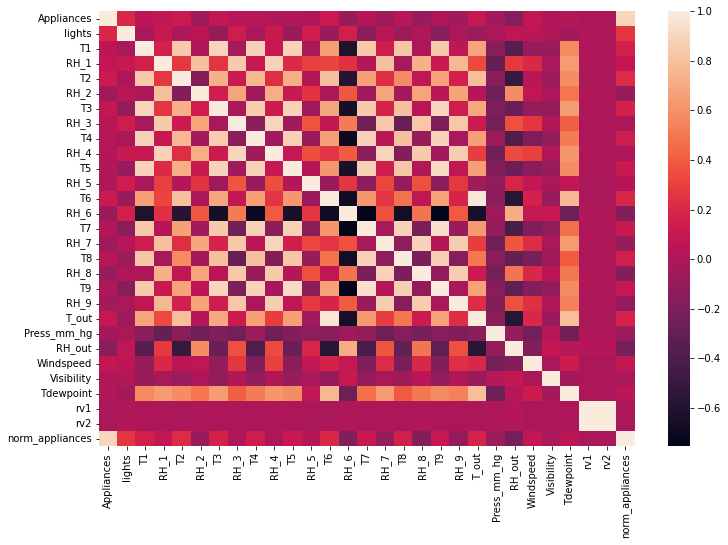

In [ ]:
#visualizing correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [ ]:
df.to_csv('norm_data.csv', index=False)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [84]:
normalised_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

In [18]:
df.drop('date',axis=1,inplace=True)

In [76]:
new_df =df.drop(['lights'],axis=1)

In [85]:
x_n = normalised_df.drop(['Appliances','norm_appliances'], axis=1)
y_n= normalised_df['Appliances']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n, y_n,
test_size=0.3)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [87]:
pred_lr = lr.predict(x_test)
mae = mean_absolute_error(y_test, pred_lr)
round(mae, 2)

0.05

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
round(rmse, 3)

0.089

In [89]:
import numpy as np
rss = np.sum(np.square(y_test - pred_lr))
round(rss, 3)

47.243

In [96]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.4)

In [98]:
pred_rig =ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_rig))
round(rmse, 3)

0.089

In [91]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [99]:
pred_las =lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_las))
round(rmse, 3)

0.095

In [92]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [94]:
linear_model_weights = get_weights_df(lr, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [95]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.462857,-0.408531,-0.000000
1,T_out,-0.345391,-0.270038,0.000000
2,T2,-0.240364,-0.198895,0.000000
3,T9,-0.204258,-0.202419,-0.000000
4,RH_8,-0.161245,-0.160163,-0.005297
5,RH_out,-0.082757,-0.053655,-0.049815
6,RH_7,-0.043123,-0.044615,-0.000000
7,RH_9,-0.036874,-0.038933,-0.000000
8,T1,-0.019534,-0.037011,0.000000
9,T5,-0.000426,-0.005992,-0.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3)

In [21]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [23]:

x= normalised_df.drop(['Appliances','norm_appliances'], axis=1)
y = normalised_df['norm_appliances']

In [29]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13814, 27) (13814,) (5921, 27) (5921,)


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
pred_lr = lr.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred_lr)
round(mae, 3)

0.084

In [72]:
x_r = np.array(df['T2'])
y_r = np.array(df['T6'])
y_r.shape

(19735,)

In [70]:
x_r.reshape(-1, 1)

array([[19.2       ],
       [19.2       ],
       [19.2       ],
       ...,
       [25.62857143],
       [25.414     ],
       [25.26428571]])

In [ ]:
#question 11
reg = LinearRegression()
reg.fit(x_r, y_r)

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
round(rmse, 3)

0.12

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, pred_lr)
round(r2_score, 3)

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.6380544 , 0.64528954, 0.6523544 , 0.64449394, 0.62899065,
        0.6272953 , 0.6451466 , 0.66269815, 0.680536  , 0.70496345,
        0.75555694, 0.8704321 , 1.        , 0.8704321 , 0.75555694,
        0.70496345, 0.680536  , 0.66269815, 0.6451466 , 0.6272953 ,
        0.62899065, 0.64449394, 0.6523544 , 0.64528954, 0.6380544 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f314becbd50>)

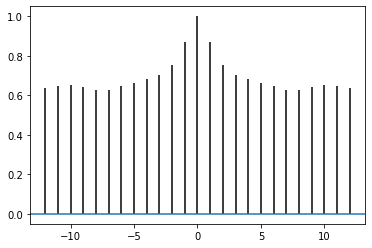

In [34]:
#check autocorrelation in Appliances
df_corr = pd.to_numeric(df['Appliances'], downcast='float')
plt.acorr(df_corr, maxlags=12)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [41]:
fs = SelectKBest(score_func=f_regression, k=15)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [42]:
x_train_fs

array([[0.        , 0.6969377 , 0.58153622, ..., 0.37762141, 0.72829582,
        0.39473684],
       [0.        , 0.2967265 , 0.10903804, ..., 0.47985651, 0.1977492 ,
        0.67763158],
       [0.        , 0.28616684, 0.04361522, ..., 0.34492274, 0.3681672 ,
        0.47368421],
       ...,
       [0.        , 0.34952482, 0.02907681, ..., 0.47282009, 0.12540193,
        0.92105263],
       [0.        , 0.66631468, 0.37727163, ..., 0.59188742, 0.47695606,
        0.82017544],
       [0.        , 0.76135164, 0.40707536, ..., 0.85816777, 0.51125402,
        0.93421053]])

In [43]:
fs.get_support()

array([ True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False])

In [44]:
cols = df.columns

In [54]:
x_train.columns[fs.get_support().tolist()]

Index(['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'RH_6', 'T7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out'],
      dtype='object')

In [55]:
x_train.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [57]:
kbest_model = LinearRegression()

In [58]:
kbest_model.fit(x_train_fs, y_train)

LinearRegression()

In [59]:
kb_pred = kbest_model.predict(x_test_fs)

In [60]:
mae = mean_absolute_error(y_test, kb_pred)
round(mae, 3)

0.088

In [61]:
rmse = np.sqrt(mean_squared_error(y_test, kb_pred))
round(rmse, 3)

0.124